In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


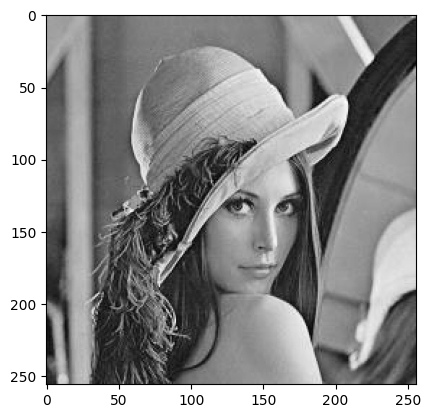

In [4]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
plt.imshow(gimg, cmap='gray')

In [5]:
gx = np.array([[-1, 0], [0,1]], dtype = int)
gy = np.array([[0, 1], [-1,0]], dtype = int)

In [6]:
x = cv2.filter2D(gimg, -1, gx)
y = cv2.filter2D(gimg, -1, gy)

In [7]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outimg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

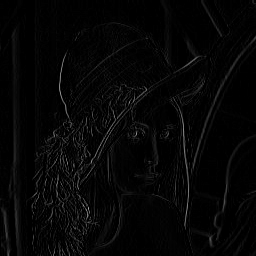

In [8]:
#outimg = outimg * 10
cv2_imshow(outimg)

In [9]:
gBin = np.zeros((gimg.shape[0], gimg.shape[1]), dtype = np.ubyte)

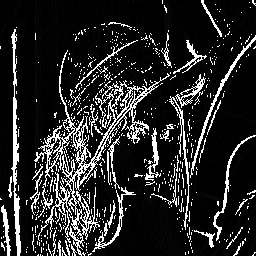

In [10]:
threshold = 10

for h in range(gimg.shape[0]):
  for w in range(gimg.shape[1]):
    if(outimg[h,w] > threshold):
      outimg[h,w] = 255

cv2_imshow(outimg)